In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import os
import pandas as pd
import re

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
print('workbookDir: ' + workbookDir)
#os.chdir(workbookDir)  # If you changed the current working dir, this will take you back to the workbook dir.

workbookDir: /Users/dagoret/MacOSX/GitHub/LSST/Spectractor/notebooks


In [40]:
import sys
sys.path.append(workbookDir)
sys.path.append(os.path.dirname(workbookDir))

In [41]:
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.logbook import LogBook
from spectractor.extractor.psf import *

# PSF1D

In [42]:
x = np.arange(0, 60, 1)

In [43]:
p = [2,30,4,2,-0.4,1,10]

In [44]:
PSF = PSF1D(*p)

In [45]:
a, b =  p[1], p[1]+3*max(p[-2], p[2])

In [46]:
fwhm = PSF.fwhm(x_array=None)

In [47]:
fwhm

7.25390625

In [48]:
assert np.isclose(fwhm, 7.25390625)

In [49]:
fwhm = PSF.fwhm(x_array=x)

In [50]:
assert np.isclose(fwhm, 7.083984375)

In [51]:
x = np.arange(0, 60, 0.01)

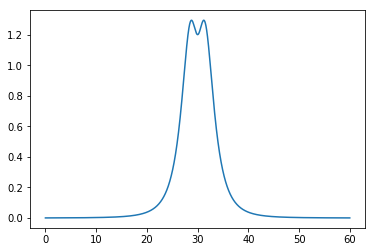

In [52]:
plt.plot(x, PSF.evaluate(x, *p)) #doctest: +ELLIPSIS

# ChromaticPSF1D and fit_transverse_PSF1D_profile

In [54]:
saturation=2000

In [55]:
s0 = ChromaticPSF1D(Nx=100, Ny=100, saturation=saturation)

In [56]:
params = s0.generate_test_poly_params()

In [57]:
saturation = params[-1]

In [58]:
data = s0.evaluate(params)

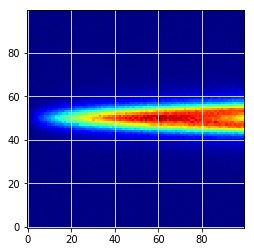

In [64]:
plt.imshow(data,origin="lower",cmap="jet")
plt.grid(True,color="w")

In [60]:
bgd = 10*np.ones_like(data)

In [61]:
data += bgd
data = np.random.poisson(data)
data_errors = np.sqrt(data+1)

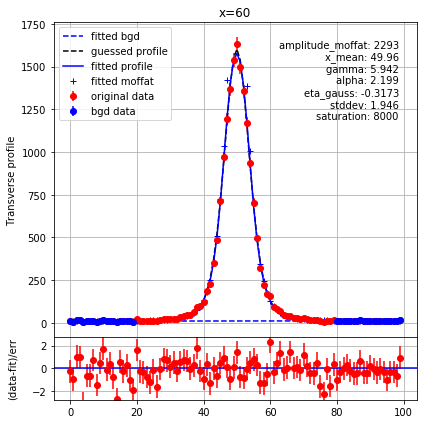

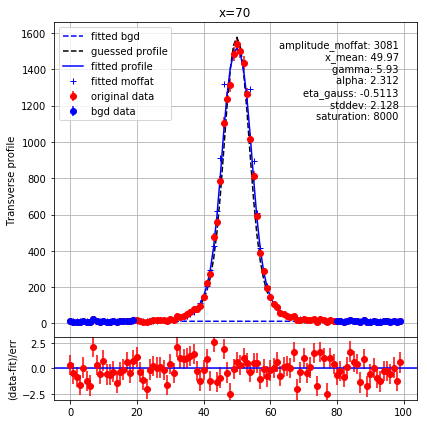

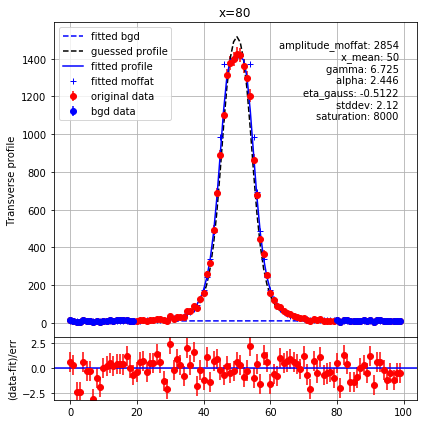

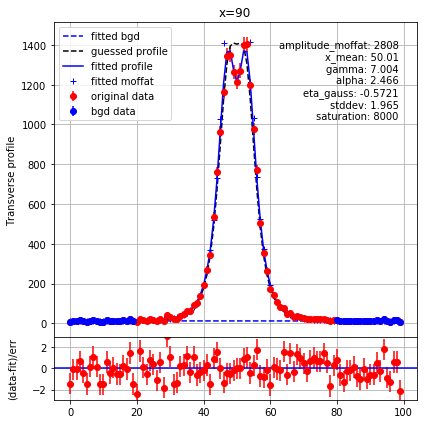

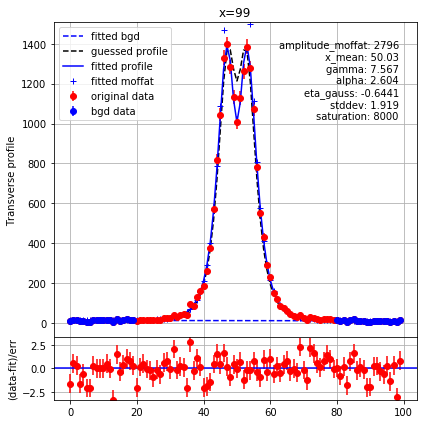

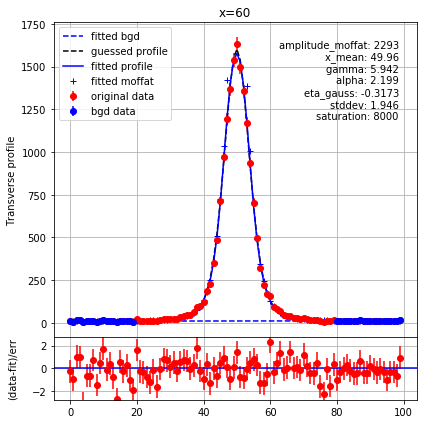

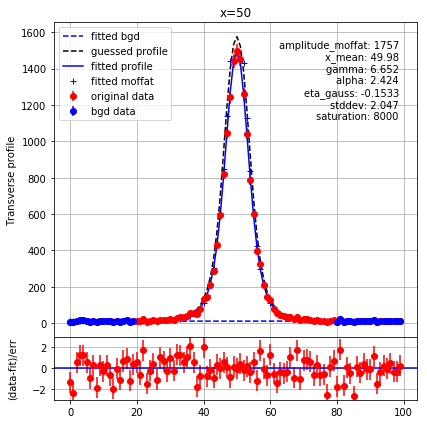

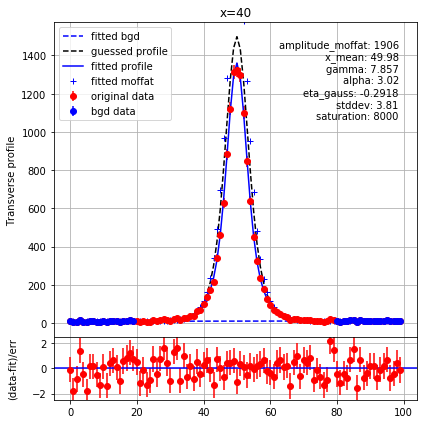

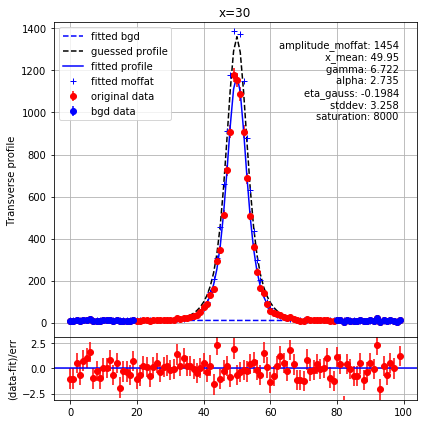

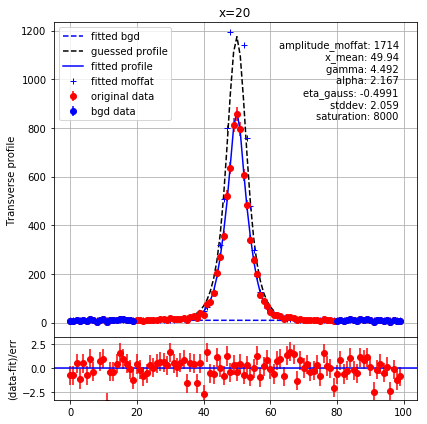

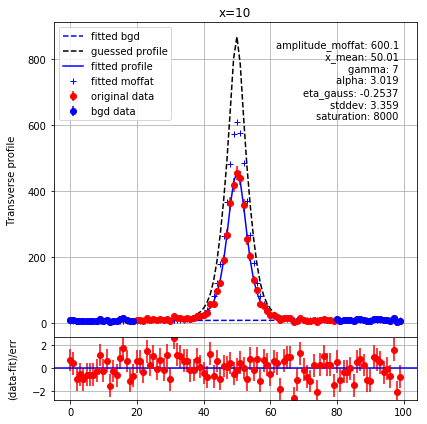

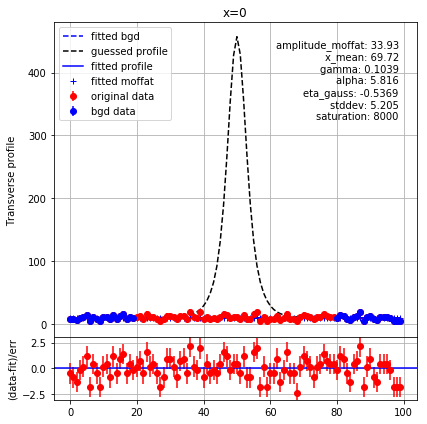

In [62]:
s, bgd_model = fit_transverse_PSF1D_profile(data, data_errors, w=20, ws=[30,50], pixel_step=10,
                                            saturation=saturation, live_fit=True, sigma=5)

In [68]:
print(s.PSF1D)

Model: PSF1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude_moffat x_mean gamma alpha eta_gauss stddev saturation
    ---------------- ------ ----- ----- --------- ------ ----------
                 0.5    0.0   3.0   3.0       1.0    1.0        1.0


In [70]:
s.degrees

{'amplitude_moffat': 4,
 'x_mean': 4,
 'gamma': 4,
 'alpha': 4,
 'eta_gauss': 4,
 'stddev': 4,
 'saturation': 0}

In [71]:
s.pixels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [72]:
s.fitted_pixels

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99])

In [74]:
s.table

lambdas,Dx,Dy,Dy_mean,flux_sum,flux_integral,flux_err,fwhm,Dy_fwhm_sup,Dy_fwhm_inf,Dx_rot,amplitude_moffat,x_mean,gamma,alpha,eta_gauss,stddev,saturation
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,0.0,0.0,0.0,58.5,4.8251849668797795e-31,33.25657829663178,126.77787726898367,0.0,0.0,0.0,33.9333070772606,69.72487613449184,0.10392682450938691,5.815574413047571,-0.5368822184602444,5.20454603461069,8000.0
0.0,0.0,0.0,0.0,436.439862666389,128.7569247438723,37.75926196630426,12.918330191983898,0.0,0.0,0.0,-27.972323108871723,66.16388177900805,1.7789703034972486,5.443569036245301,-0.43480664497297095,5.089257397727504,8000.0
0.0,0.0,0.0,0.0,811.3555581749708,157.46429512466102,42.021899354090365,14.125404802963303,0.0,0.0,0.0,-54.75290615577028,63.02225853601835,3.182405566617237,5.092545895765729,-0.35379772562417655,4.949814609069328,8000.0
0.0,0.0,0.0,0.0,1183.2236606543913,80.5227371704736,46.0552103989847,15.447590411483077,0.0,0.0,0.0,-49.70311045788734,60.27522823175846,4.333963001390006,4.76233389856505,-0.2921020337125439,4.7895070205167185,8000.000000000002
0.0,0.0,0.0,0.0,1552.0207442332946,13.171159019016152,49.869915039981734,17.116083990071928,0.0,0.0,0.0,-16.11760440967508,57.898012692464036,5.253372995336208,4.452761951599447,-0.24796614253675522,4.611623983950225,8000.000000000002
0.0,0.0,0.0,0.0,1917.723383040327,153.1042594899526,53.476733216076084,4.47145751125845,0.0,0.0,0.0,42.70894359441418,55.865833744370775,5.960365935976498,4.163658961825113,-0.21963662539549303,4.4194548512504,8000.000000000002
0.0,0.0,0.0,0.0,2280.308151204133,535.1113586135539,56.88638486626229,5.149204822571221,0.0,0.0,0.0,123.48186515992833,54.15391321371439,6.474672210831527,3.894853836198237,-0.20536005558743964,4.216288974297796,8000.000000000002
0.0,0.0,0.0,0.0,2639.7516228533577,1124.3333753612267,60.109589929534884,5.7633353965389205,0.0,0.0,0.0,222.9064918924149,52.73747292673054,6.816022207421948,3.646175481675009,-0.20338300641127743,4.005415704972962,7999.999999999999
0.0,0.0,0.0,0.0,2996.030372116648,1881.3282142364449,63.157068344888486,6.271608705690028,0.0,0.0,0.0,337.68815539742195,51.591734709654986,7.004146313268421,3.417452805211622,-0.21195205116568908,3.7901243951564574,8000.000000000004


In [66]:
bgd_model

# fit_PSF1D_minuit_outlier_removal

In [77]:
PSF = PSF1D()

In [81]:
X = np.arange(0, 60,1.)

In [82]:
p = (1000, 25, 5, 1, -0.2, 1, 6000)

In [83]:
Y = PSF.evaluate(X, *p)

In [84]:
Y += 100*np.exp(-((X-10)/2)**2)

In [87]:
Y_err = np.sqrt(1+Y)

<ErrorbarContainer object of 3 artists>

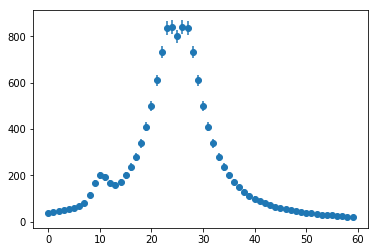

In [88]:
plt.errorbar(X,Y,yerr=Y_err,fmt="o")

In [89]:
guess = (600, 20, 3.2, 1.2, -0.1, 2,  6000)
bounds = ((0, 6000), (10, 40), (0.5, 10), (0.5, 5), (-1, 0), (0.01, 10), (0, 8000))

In [90]:
model, outliers = fit_PSF1D_minuit_outlier_removal(X, Y, guess=guess, bounds=bounds, data_errors=Y_err,sigma=3, niter=2, consecutive=3)

In [91]:
res = [getattr(model, p).value for p in model.param_names]
assert np.all(np.isclose(p[:-1], res[:-1], rtol=1e-1))

In [92]:
print(model)

Model: PSF1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude_moffat       x_mean       ...       stddev       saturation
    ---------------- ------------------ ... ------------------ ----------
    991.150620248466 24.947684680810355 ... 0.9731247592940273     6000.0


In [93]:
res

[991.150620248466,
 24.947684680810355,
 5.005410109086422,
 0.9857893282865442,
 -0.1952094920867098,
 0.9731247592940273,
 6000.0]